In [10]:
from pathlib import Path
import json
import matplotlib.pyplot as plt


def plot_graph(file_path):
    # Load the JSON file
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract data
    layer_indexes = [int(key) for key in data.keys()]
    activations_kb = [value["activation"] / 1024 for value in data.values()]
    param_sizes_kb = [value["param_size"] / 1024 for value in data.values()]
    exec_times = [value["exec_time"] for value in data.values()]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=[15, 5])

    # Plot size data on the left y-axis (in KB)
    ax1.plot(
        layer_indexes,
        activations_kb,
        label="Activation Size (KB)",
        color="blue",
    )
    ax1.fill_between(layer_indexes, 0, activations_kb, color="blue", alpha=0.1)
    ax1.plot(
        layer_indexes,
        param_sizes_kb,
        label="Parameter Size (KB)",
        color="orange",
    )
    ax1.fill_between(
        layer_indexes, 0, param_sizes_kb, color="orange", alpha=0.1
    )
    ax1.set_xlabel("Layer Index")
    ax1.set_ylabel("Size (KB)")
    ax1.legend(loc="upper left")
    ax1.grid(True)

    # Create a second y-axis to plot execution time
    ax2 = ax1.twinx()
    ax2.plot(layer_indexes, exec_times, label="Cum. Exec. Time", color="green")
    ax2.set_ylabel("Time")
    ax2.set_ylim(bottom=0)  # Set the y-axis to start from 0
    ax2.legend(loc="upper right")

    plt.title(f"{file_path.stem}")
    plt.show()

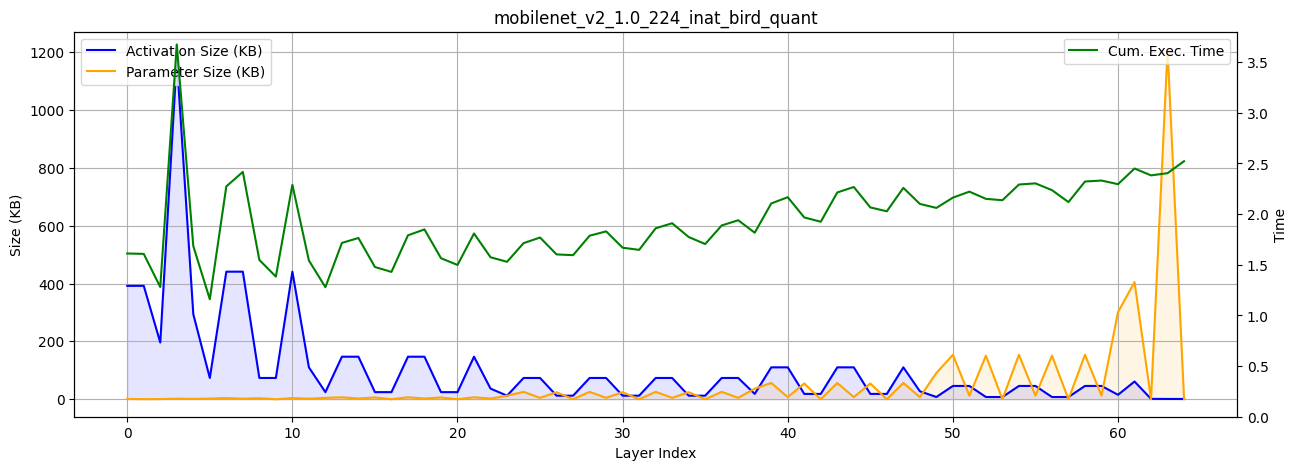

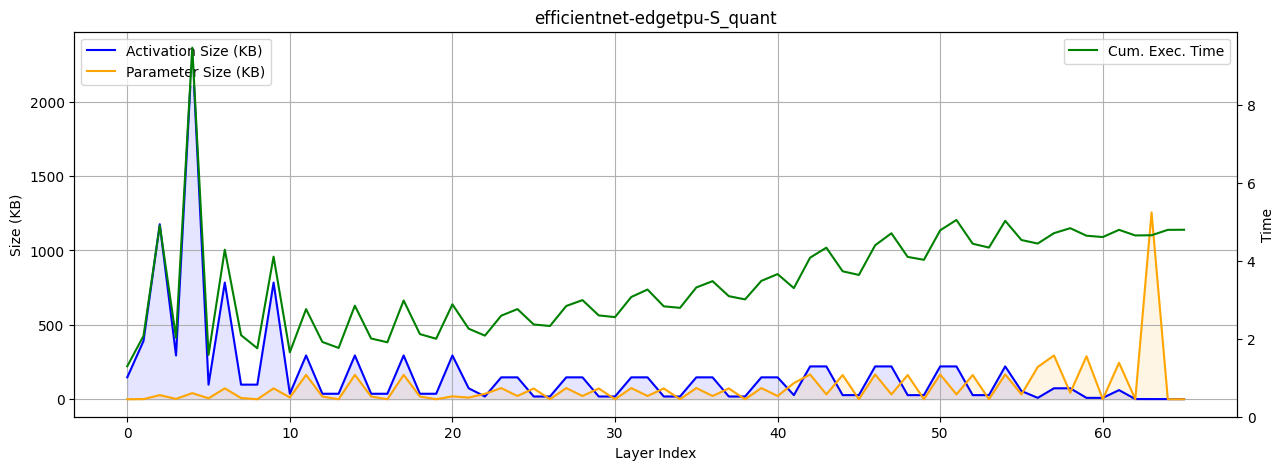

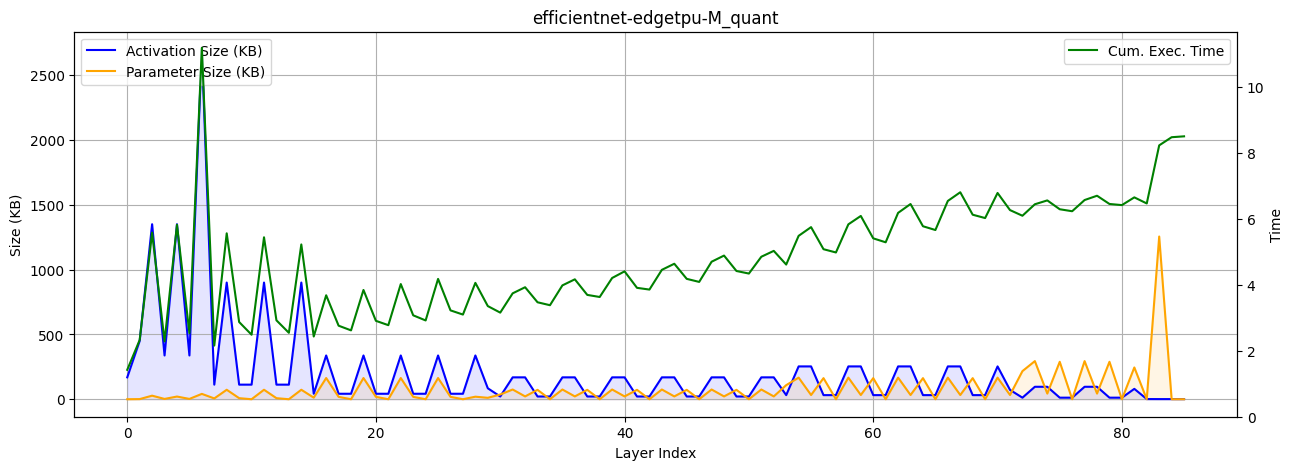

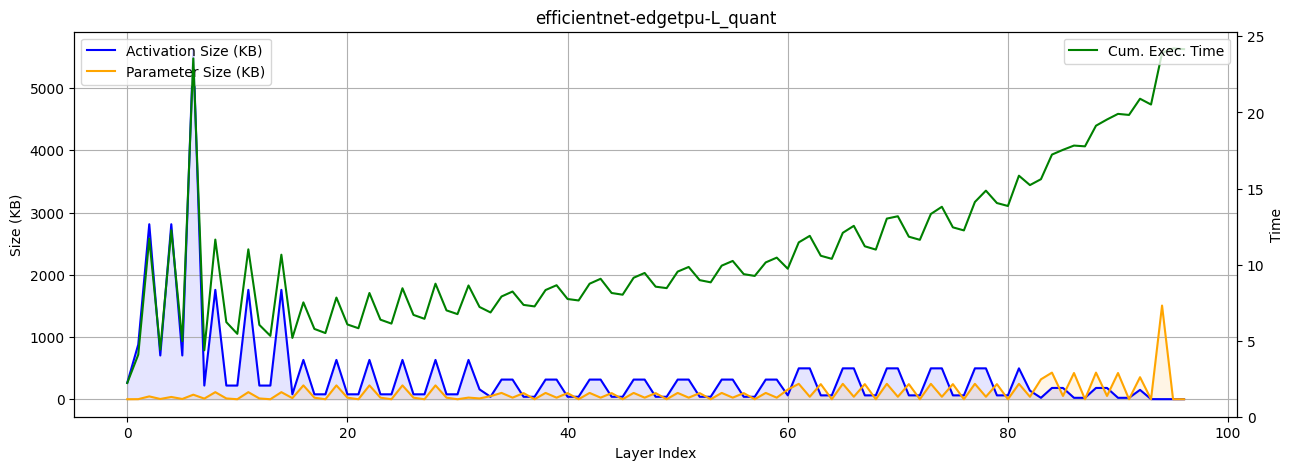

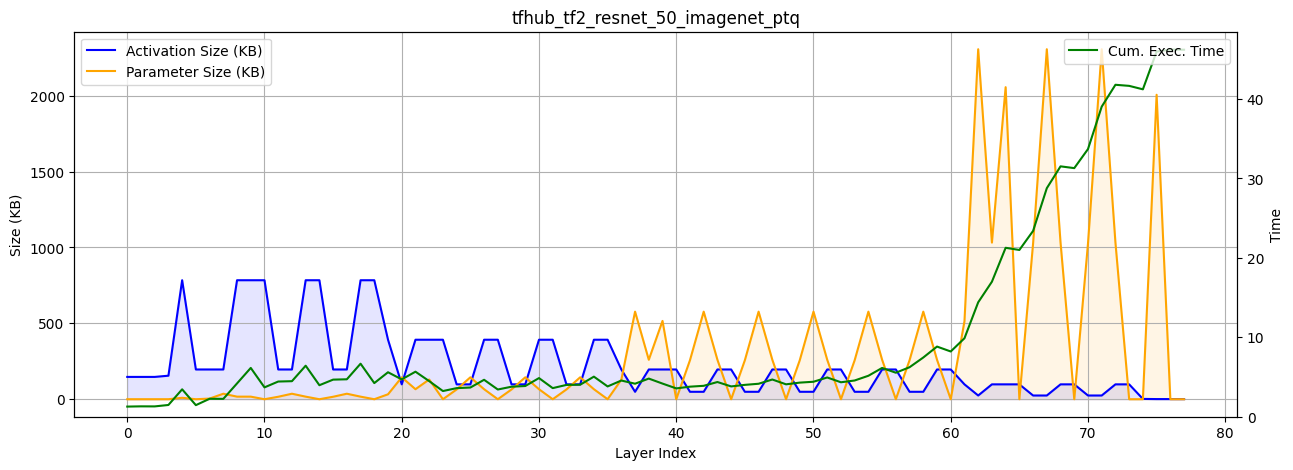

In [11]:
file_paths = [
    Path("data/mobilenet_v2_1.0_224_inat_bird_quant.json"),
    Path("data/efficientnet-edgetpu-S_quant.json"),
    Path("data/efficientnet-edgetpu-M_quant.json"),
    Path("data/efficientnet-edgetpu-L_quant.json"),
    Path("data/tfhub_tf2_resnet_50_imagenet_ptq.json"),
]
for file_path in file_paths:
    plot_graph(file_path)

In [14]:
def plot_exec_time(file_path):
    # Load the JSON file
    file_path_obj = Path(file_path)
    with open(file_path_obj, "r") as file:
        data = json.load(file)

    # Extract data
    layer_indexes = [int(key) for key in data.keys()]
    exec_times = [value["exec_time"] for value in data.values()]

    # Find the minimum execution time
    min_exec_time = min(exec_times)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=[15, 5])

    # Plot execution time
    ax.plot(layer_indexes, exec_times, label="Cum. Exec. Time", color="green")
    ax.axhline(
        y=min_exec_time, color="r", linestyle="--"
    )  # Horizontal line for min value
    ax.text(
        layer_indexes[-1],
        min_exec_time,
        f"{min_exec_time:.2f}",
        va="center",
        ha="right",
        backgroundcolor="w",
    )  # Text for min value
    ax.set_xlabel("Layer Index")
    ax.set_ylabel("Time")
    ax.set_ylim(bottom=0)  # Set the y-axis to start from 0
    ax.legend(loc="upper right")
    ax.grid(True)

    plt.title(file_path_obj.stem)
    plt.show()

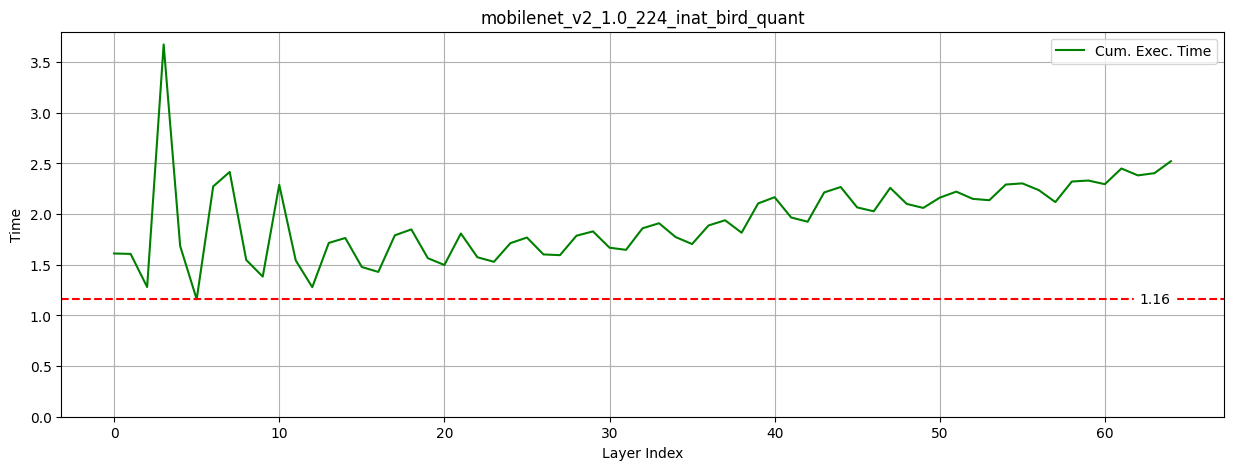

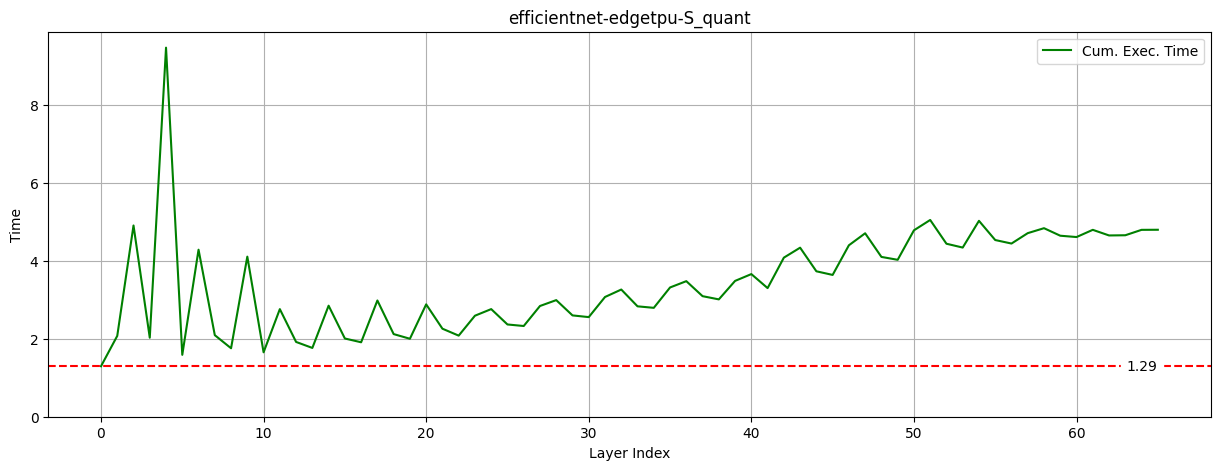

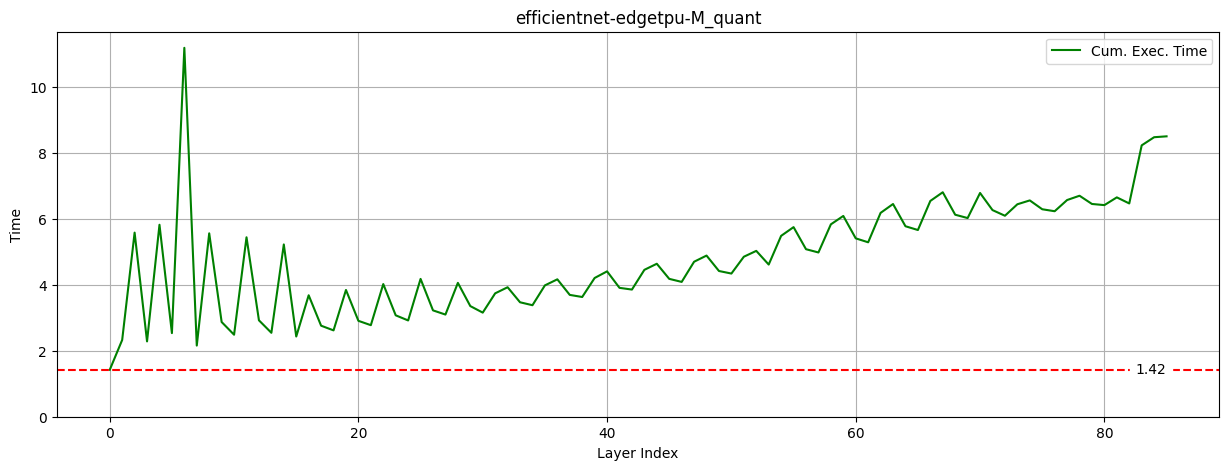

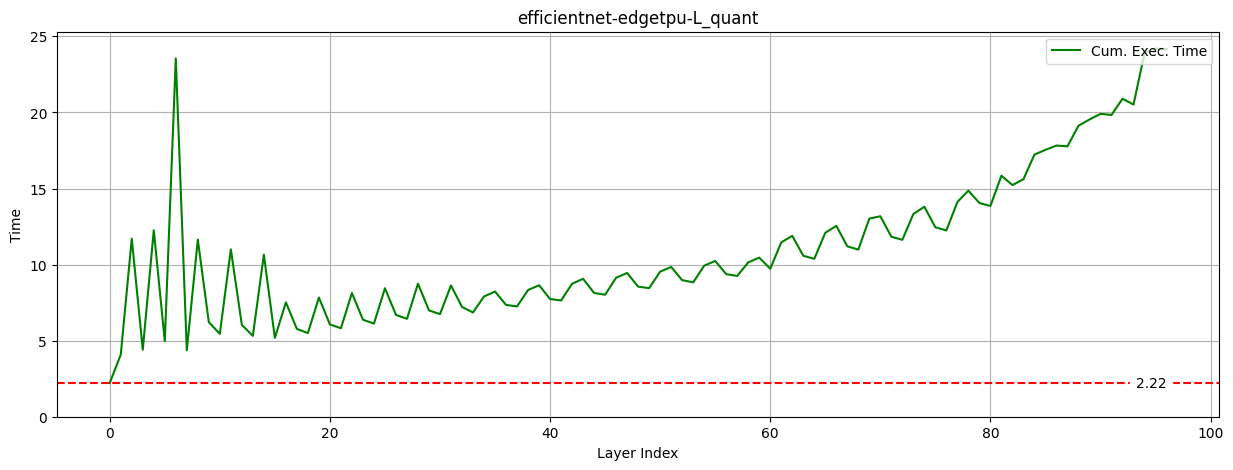

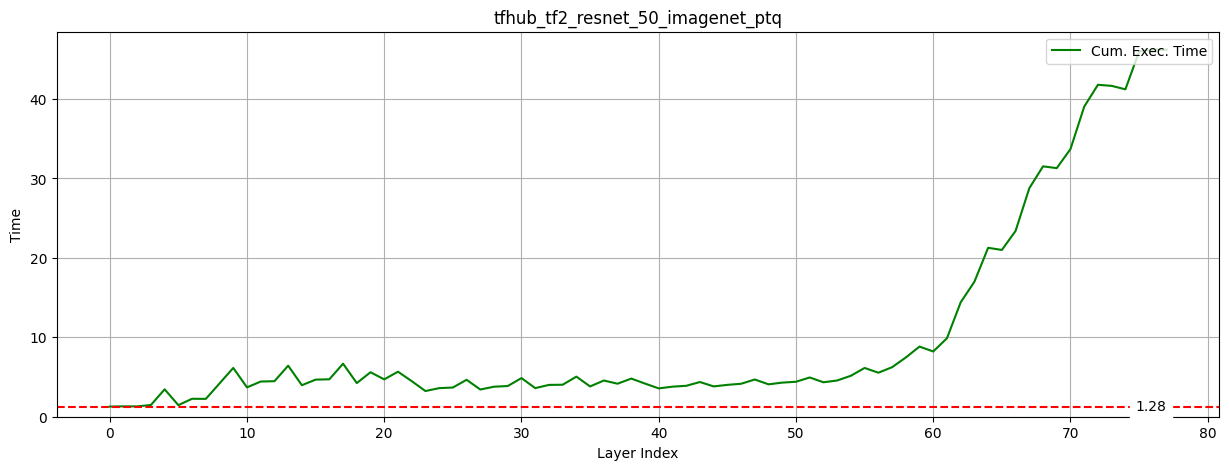

In [15]:
file_paths = [
    Path("data/mobilenet_v2_1.0_224_inat_bird_quant.json"),
    Path("data/efficientnet-edgetpu-S_quant.json"),
    Path("data/efficientnet-edgetpu-M_quant.json"),
    Path("data/efficientnet-edgetpu-L_quant.json"),
    Path("data/tfhub_tf2_resnet_50_imagenet_ptq.json"),
]
for file_path in file_paths:
    plot_exec_time(file_path)